# Задача классификации. Метод SVM.

Загружаем необходимые модули.

In [2]:
import numpy as np # NUMerical PYthon
import sklearn.svm as svm # module for Support Vector Machines
import sklearn.metrics as metrics

import matplotlib.pyplot as plt

Загружаем данные для работы с ними

In [3]:
import sklearn.datasets as datasets
iris = datasets.load_iris()

Переведем названия классов в номера классов:

In [4]:
class_names = iris.target_names
print(class_names)

['setosa' 'versicolor' 'virginica']


In [5]:
attr_names = iris.feature_names
print(attr_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [6]:
X = iris.data
Y = iris.target

In [7]:
print(X)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [8]:
print(Y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


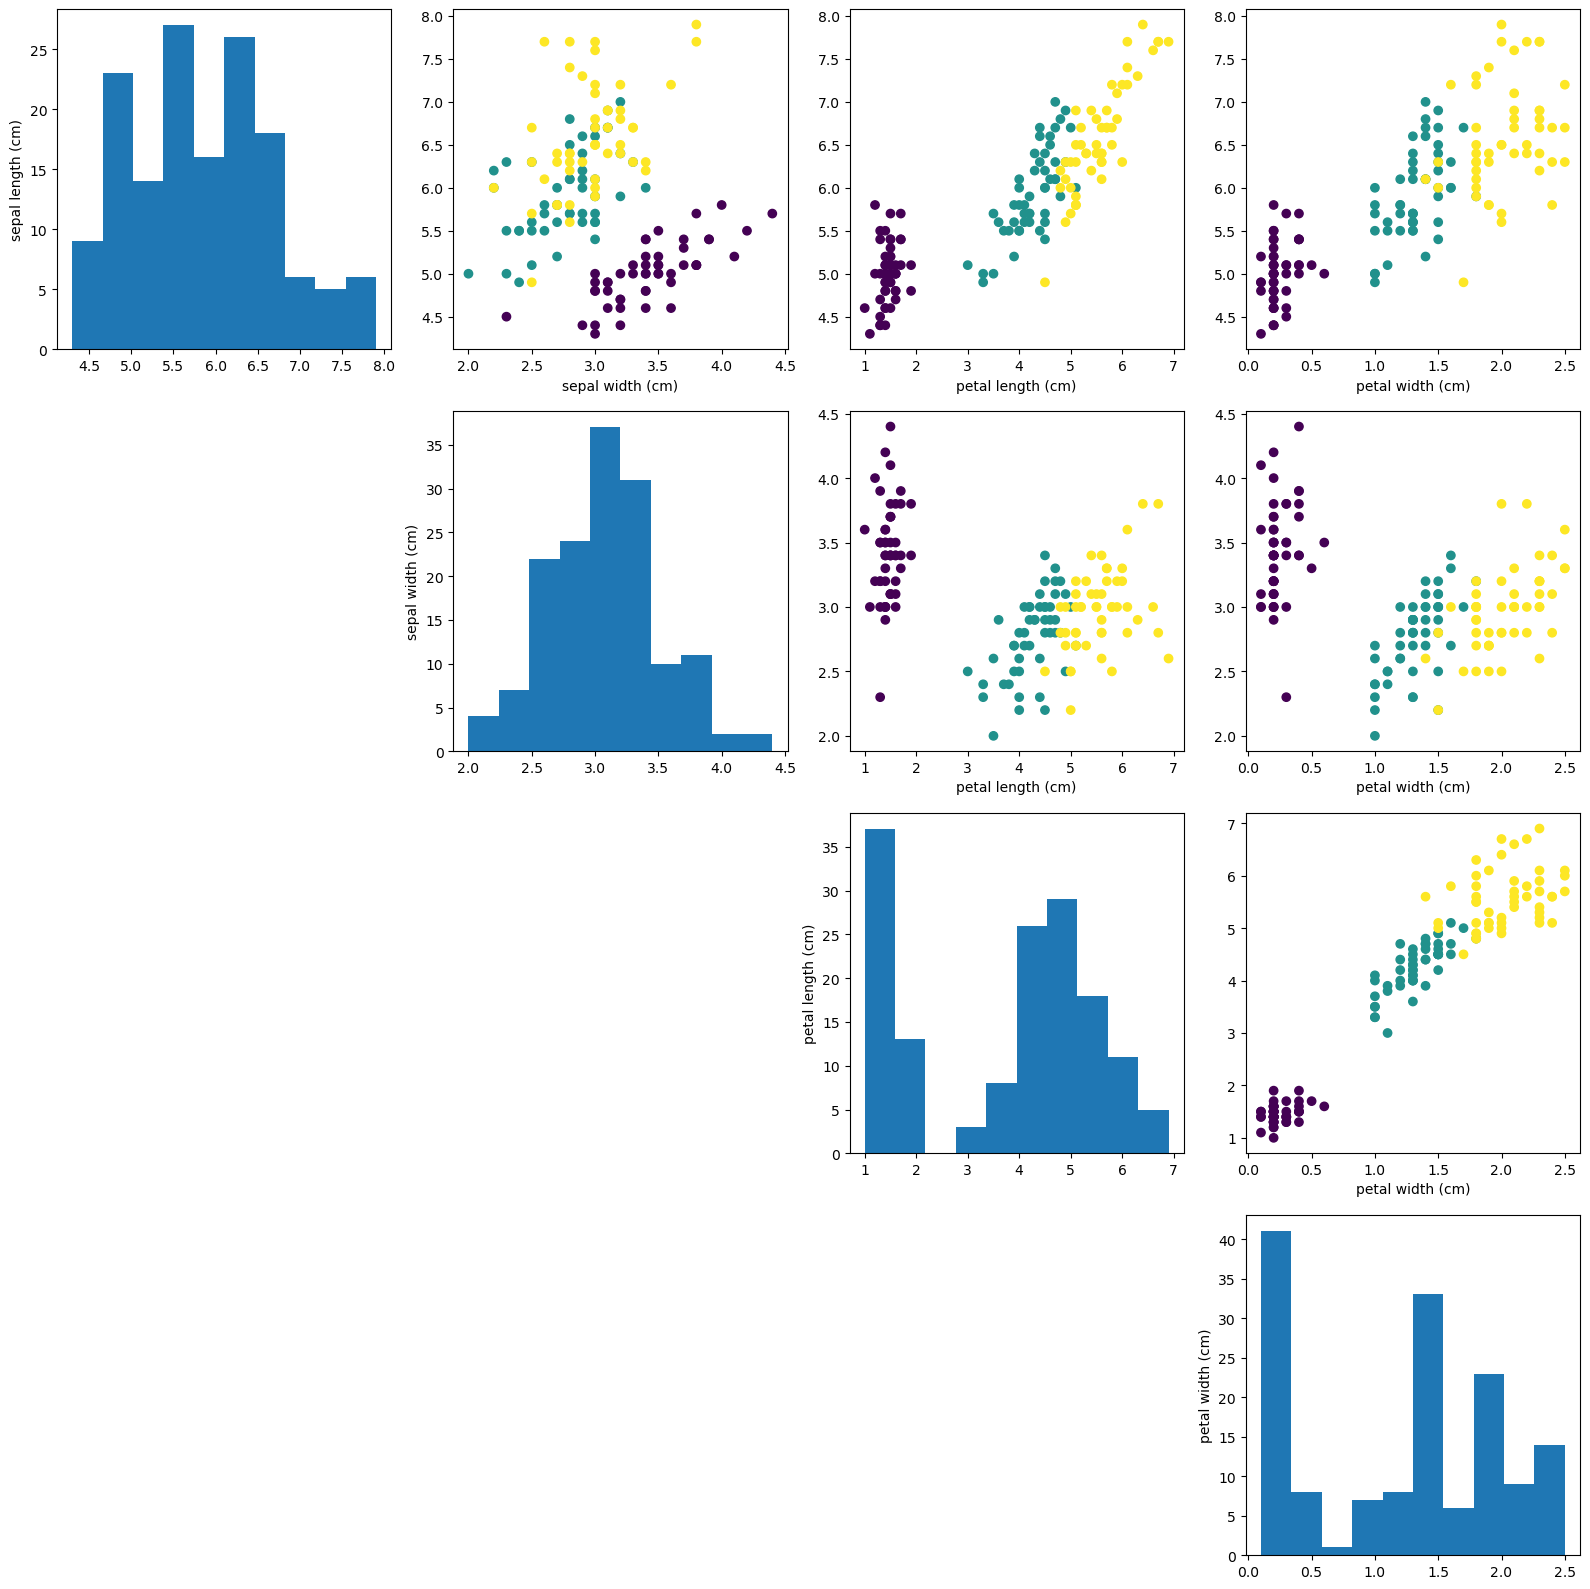

In [9]:
plt.figure(figsize=(16,16))
for i in range(4):
    for j in range(i,4):
        plt.subplot(4, 4, 4*i+j+1)
        if i == j:
            plt.ylabel(attr_names[i])
            plt.hist(X[:,i])
        else:
            plt.scatter(X[:,j], X[:,i], c=Y)
            plt.xlabel(attr_names[j])
plt.tight_layout()
plt.show()

Для классификации используем класс SVC и модуля svm:

In [10]:
alg = svm.SVC(kernel='linear')

Обучаем, используя метод `fit(X,Y)`.

In [11]:
alg.fit(X, Y)

SVC(kernel='linear')

Проверим:

In [12]:
Y_p = alg.predict(X)

In [14]:
I_err = []
for k, y_p, y in zip(range(len(Y)), Y_p, Y):
    if y_p != y:
        I_err.append(k)
        print(f'Неудача {y_p} != {y} в строке {k}')
        
I_err = np.array(I_err)
X_err = X[I_err]
Y_err = Y_p[I_err]

Неудача 2 != 1 в строке 83


Есть одна ошибка. Для оценки качества функционирования обученного алгоритма есть модуль:

In [15]:
score = metrics.accuracy_score(Y_p, Y) # определяет долю совпадающих ответов
print(f'{score*100}%') # результат в процентах

99.33333333333333%


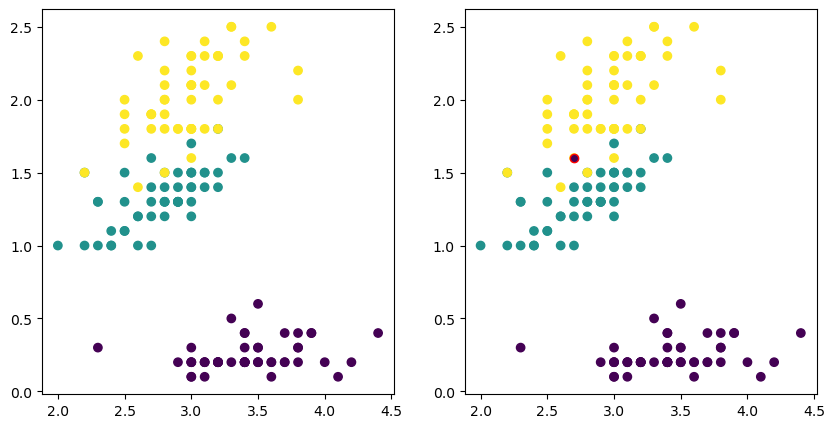

In [16]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.scatter(X[:,1], X[:,3], c=Y)
plt.subplot(1, 2, 2)
plt.scatter(X[:,1], X[:,3], c=Y_p)
plt.scatter(X_err[:,1], X_err[:,3], c=Y_err, edgecolors='r')
plt.show()

/tmp/ipykernel_138749/4075681983.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4, 4, 4*i+j+1)


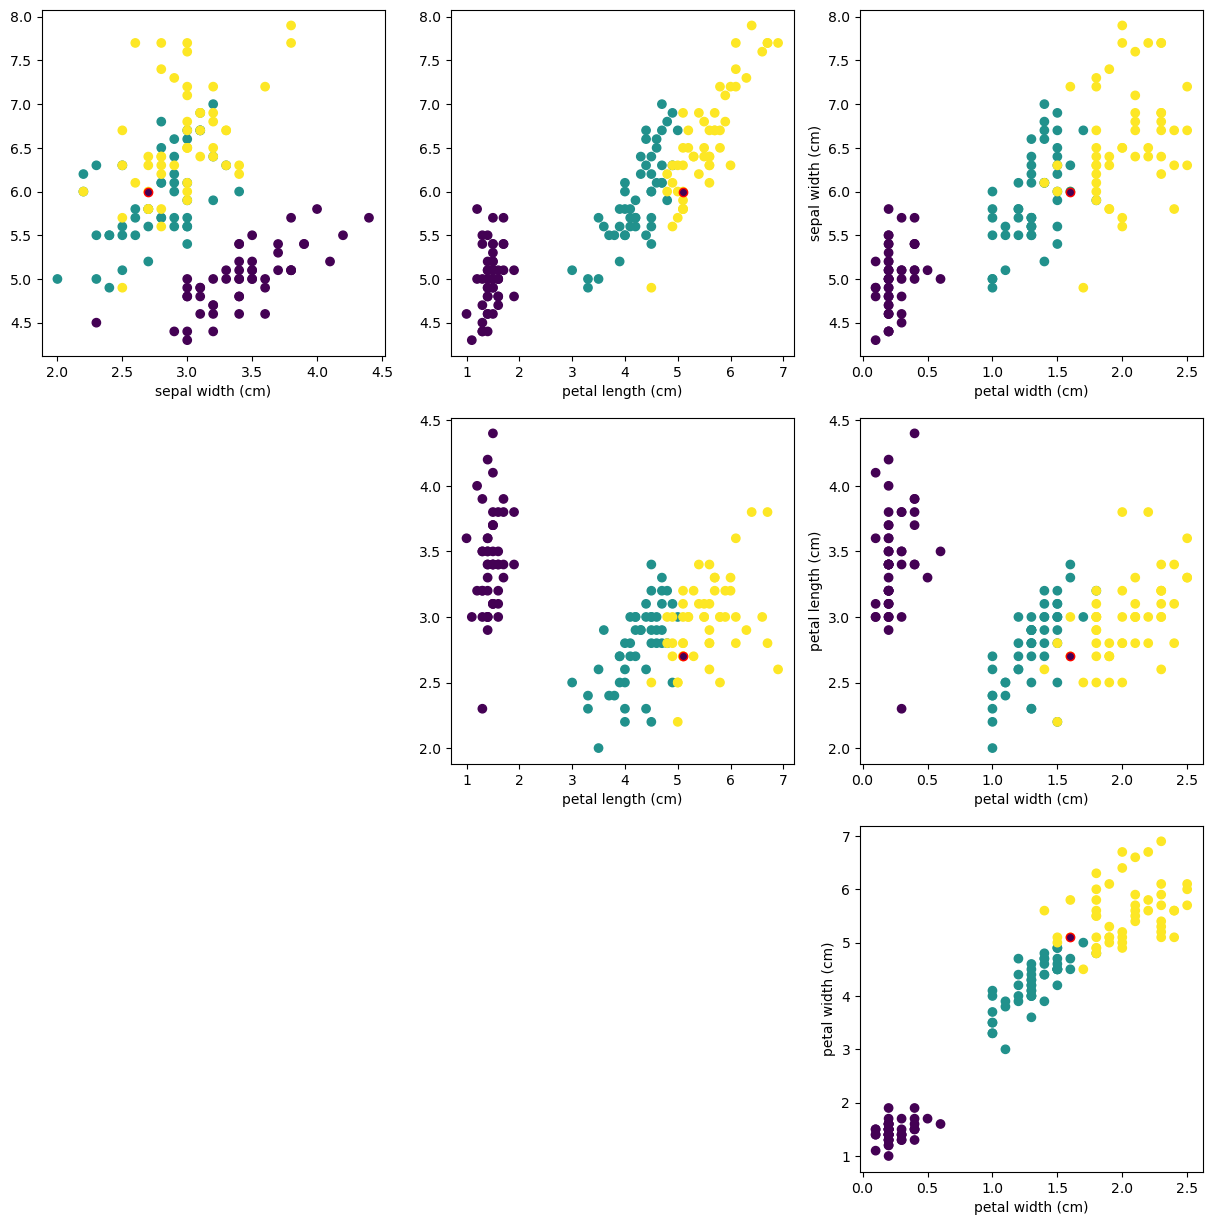

In [18]:
plt.figure(figsize=(16,16))
for i in range(4):
    for j in range(i,4):
        if i != j:
            plt.subplot(4, 4, 4*i+j+1)
        if i == j:
            plt.ylabel(attr_names[i])
            # plt.hist(X[:,i])
        else:
            plt.scatter(X[:,j], X[:,i], c=Y_p)
            plt.scatter(X_err[:,j], X_err[:,i], c=Y_err, edgecolors='r')
            plt.xlabel(attr_names[j])
plt.tight_layout()
plt.show()

In [23]:
alg2 = svm.SVC(kernel='rbf', C=100, gamma=8)

In [24]:
alg2.fit(X, Y)

SVC(C=100, gamma=8)

In [25]:
Y2_p = alg2.predict(X)

In [26]:
score = metrics.accuracy_score(Y2_p, Y) # определяет долю совпадающих ответов
print(f'{score*100}%') # результат в процентах

100.0%


In [27]:
digits = datasets.load_digits()

In [28]:
X = digits.data
Y = digits.target

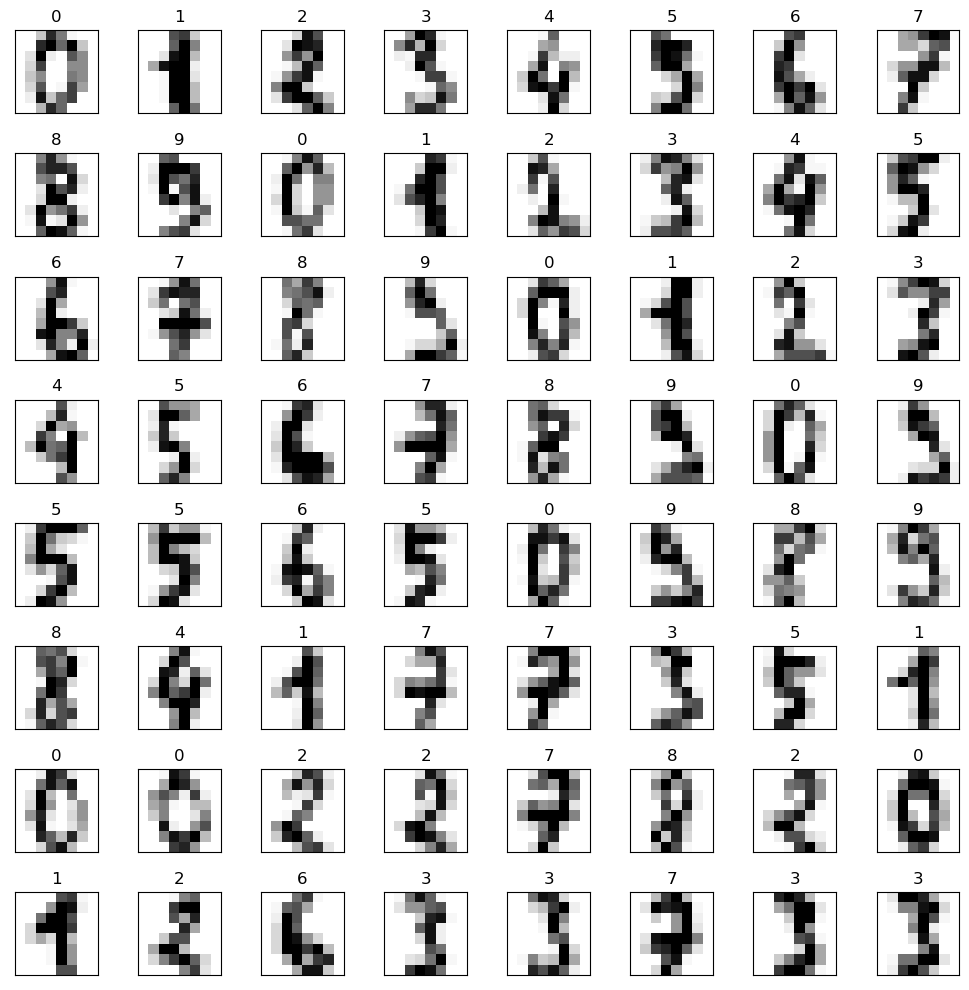

In [31]:
IR = np.random.randint(0,len(X), size=64)
plt.figure(figsize=(10,10))
for i in range(8):
    for j in range(8):
        k = 8*i+j
        Xij = X[k]
        Yij = Y[k]
        plt.subplot(8, 8, k+1)
        plt.title(str(Yij))
        plt.imshow(Xij.reshape(8,8), cmap=plt.cm.Greys)
        plt.xticks([])
        plt.yticks([])
plt.tight_layout()
plt.show()

In [32]:
svc_dg = svm.SVC(kernel='linear')

In [33]:
svc_dg.fit(X, Y)

SVC(kernel='linear')

In [34]:
Y_p = svc_dg.predict(X)

In [35]:
metrics.accuracy_score(Y_p, Y)

1.0

In [37]:
print(svc_dg.support_vectors_.shape)
print(svc_dg.support_vectors_)

(436, 64)
[[ 0.  0.  2. ...  6.  0.  0.]
 [ 0.  0. 10. ... 12.  4.  0.]
 [ 0.  0.  0. ...  6.  0.  0.]
 ...
 [ 0.  0.  1. ...  0.  0.  0.]
 [ 0.  0. 12. ...  3.  0.  0.]
 [ 0.  0.  4. ...  9.  0.  0.]]


### Задача 8

Обучить алгоритм классификации (SVC) по методу SVM (sklearn.svm.SVC) на наборе данных [wine](https://archive.ics.uci.edu/ml/datasets/Wine).
Определить к каких строках исходных данных произошли ошибки. Оценить относительное число правильных ответов (sklearn.metrics.accuracy_score).
Изобразить в проекциях по парам атрибутов классы объектов, используя диаграммы рассеяния (plt.scatter), результаты классификации. Пары атрибутов выбрать, такие чтобы исходно заданнаяя классификация (разделение на классы) была более отчетливой.

In [38]:
wine = datasets.load_wine()

In [27]:
attr_names = wine.feature_names
print(attr_names)
cls_names = wine.target_names
print(cls_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
['class_0' 'class_1' 'class_2']


In [39]:
X = wine.data
Y = wine.target

In [41]:
print(X)

[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]


In [42]:
print(Y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


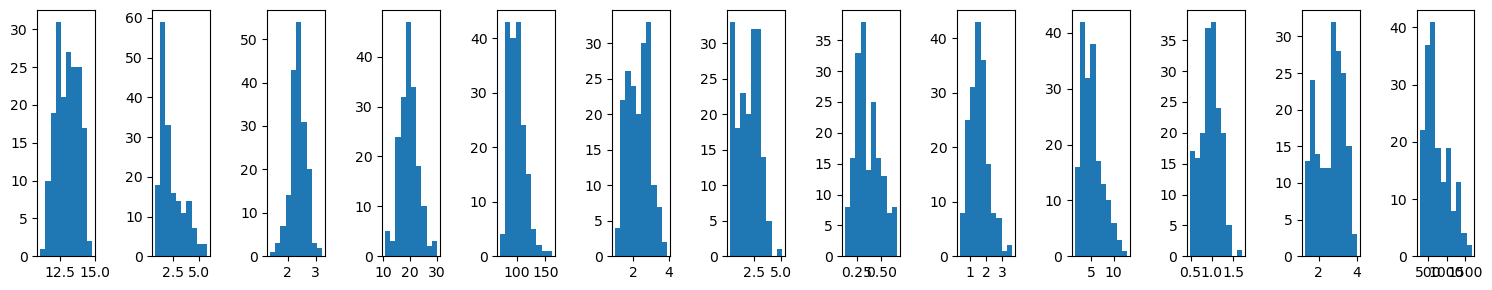

In [43]:
plt.figure(figsize=(15,3))
for i in range(13):
    plt.subplot(1,13,i+1)
    plt.hist(X[:,i])
plt.tight_layout()
plt.show()

In [44]:
import sklearn.preprocessing as preprocessing

$$
x_k \to \dfrac{x_k-\bar x}{\sigma}
$$

$$
\bar x = \frac {1}{N}\sum_{k=1}^N x_k
$$

$$
\sigma^2 = \frac {1}{N}\sum_{k=1}^N (x_k - \bar x)^2
$$


In [45]:
Xp = preprocessing.scale(X)

In [46]:
print(Xp)

[[ 1.51861254 -0.5622498   0.23205254 ...  0.36217728  1.84791957
   1.01300893]
 [ 0.24628963 -0.49941338 -0.82799632 ...  0.40605066  1.1134493
   0.96524152]
 [ 0.19687903  0.02123125  1.10933436 ...  0.31830389  0.78858745
   1.39514818]
 ...
 [ 0.33275817  1.74474449 -0.38935541 ... -1.61212515 -1.48544548
   0.28057537]
 [ 0.20923168  0.22769377  0.01273209 ... -1.56825176 -1.40069891
   0.29649784]
 [ 1.39508604  1.58316512  1.36520822 ... -1.52437837 -1.42894777
  -0.59516041]]


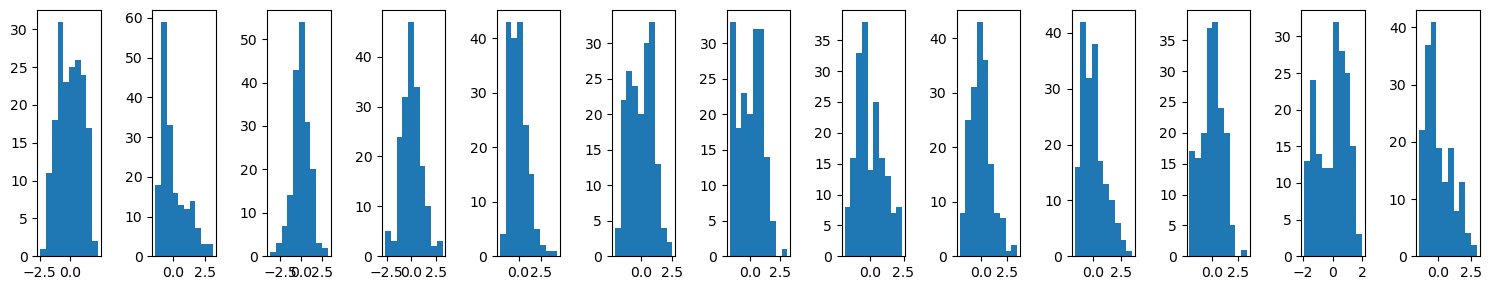

In [47]:
plt.figure(figsize=(15,3))
for i in range(13):
    plt.subplot(1,13,i+1)
    plt.hist(Xp[:,i])
plt.tight_layout()
plt.show()